In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [7]:
df.columns

Index(['cgpa', 'package'], dtype='object')

In [8]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


<Axes: >

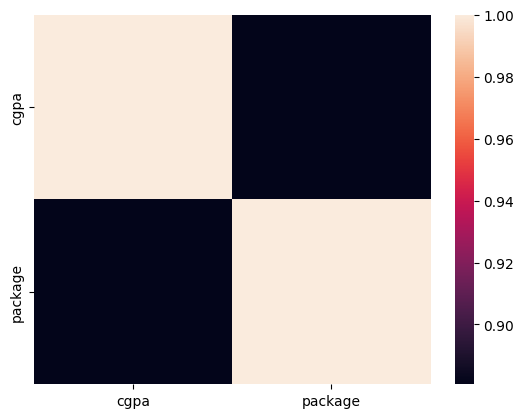

In [9]:
sns.heatmap(df.corr())

<Axes: >

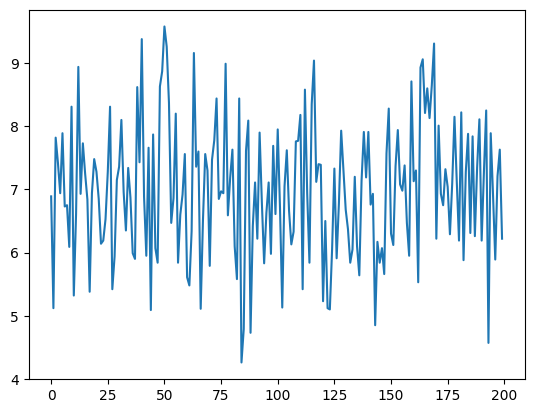

In [10]:
df['cgpa'].plot(kind='line')

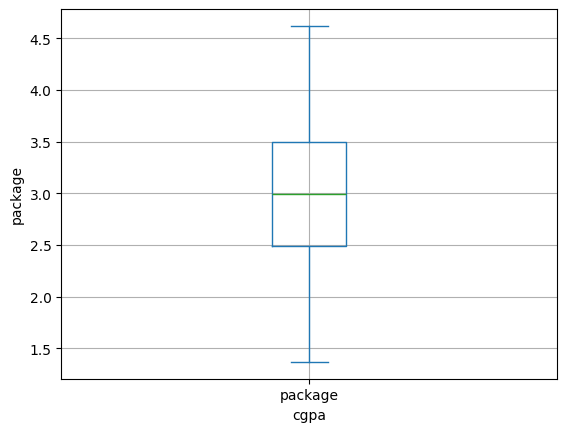

In [11]:
df.plot(x='cgpa', y='package', kind='box')
plt.grid()
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()

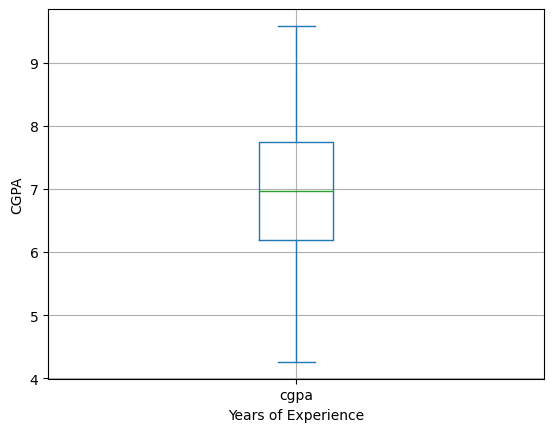

In [12]:
df.plot(x='package', y='cgpa', kind='box')
plt.grid()
plt.xlabel("Years of Experience")
plt.ylabel("CGPA")
plt.show()


<Axes: xlabel='cgpa', ylabel='package'>

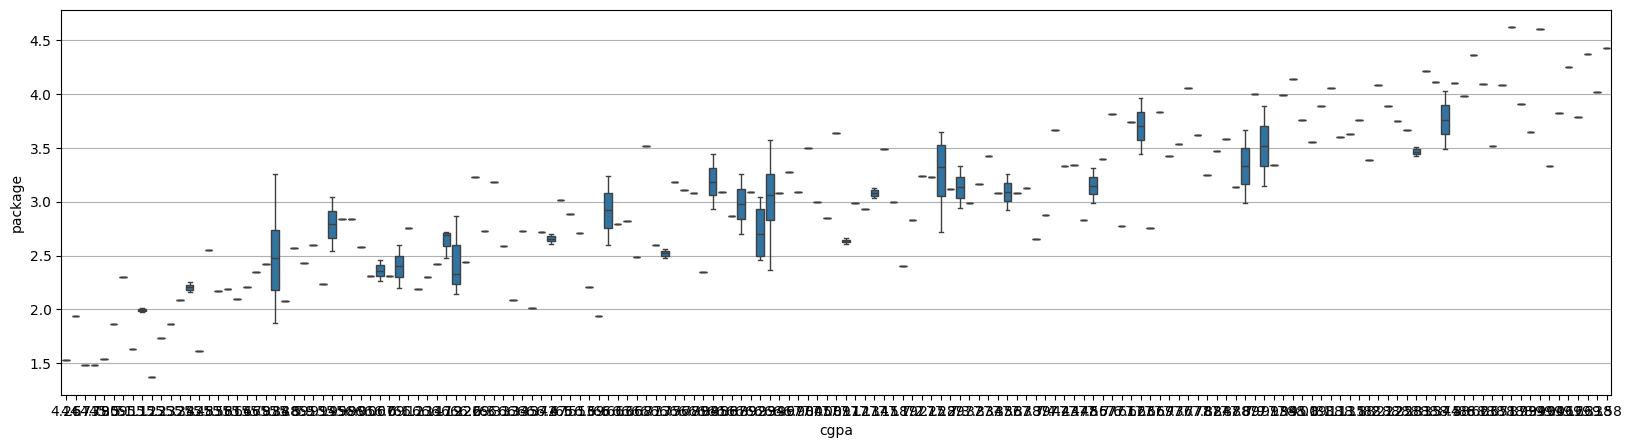

In [13]:
plt.figure(figsize=(20,5))
plt.grid()
sns.boxplot(x=df['cgpa'], y=df['package'])

<Axes: xlabel='cgpa', ylabel='package'>

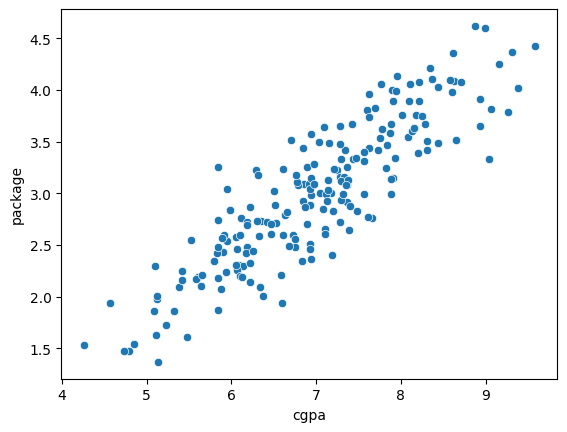

In [14]:
sns.scatterplot(data=df, x='cgpa', y='package')

In [15]:
#splitting and Training data

In [16]:
x=df[['cgpa']]
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [17]:
y=df['package']
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [19]:
len(x_train),len(x_test), len(y_train), len(x), len(y)

(160, 40, 160, 200, 200)

In [20]:
model_lr=LinearRegression()

In [21]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred_lr=model_lr.predict(x_test)

In [23]:
y_pred_lr

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [24]:
slope_lr = model_lr.coef_[0]
slope_lr

np.float64(0.5742564727019197)

In [25]:
intercept_lr = model_lr.intercept_
intercept_lr

np.float64(-1.0270069374542108)

In [26]:
#Evaluation

In [27]:
mae_lr= mean_absolute_error(y_test, y_pred_lr)
mae_lr

0.23150985393278373

In [28]:
mse_lr= mean_squared_error(y_test, y_pred_lr)
mse_lr

0.08417638361329656

In [29]:
rmse_lr= mse_lr ** 0.5
rmse_lr

0.2901316659954521

In [30]:
r2_lr= r2_score(y_test, y_pred_lr)
r2_lr

0.7730984312051673

Text(0.5, 1.0, 'Simple Linear Regression')

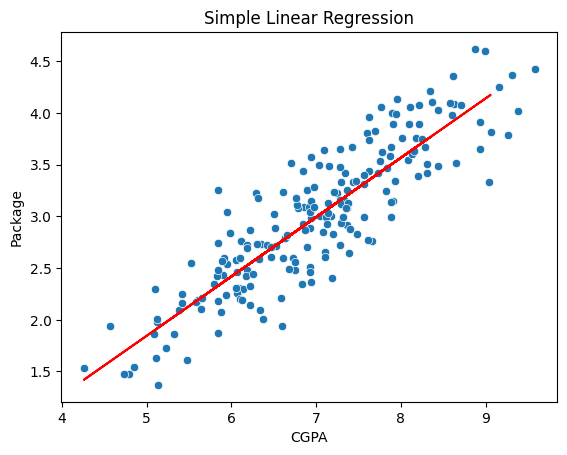

In [31]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.plot(x_test, y_pred_lr, color="red", label="Regression Line",)
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Simple Linear Regression")

In [32]:
# Print Results
print(f"Slope: {slope_lr}")
print(f"Intercept: {intercept_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-Squared Score: {r2_lr}")

Slope: 0.5742564727019197
Intercept: -1.0270069374542108
Mean Absolute Error: 0.23150985393278373
Mean Squared Error: 0.08417638361329656
R-Squared Score: 0.7730984312051673
